 **В первой ячейке импортируются все необходимые библиотеки для дальнейшей работы с датасетом**

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve


**Во второй ячейке добавляется необходимый датасет и удаляется колонка 'filename', которая не нужна для дальнейшей работы**

In [ ]:
df = pd.read_csv('bbc-news-data.csv',sep='\t')
df = df.drop(columns=['filename'])
df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


**В третьей ячейке данные в датасете разделяются на обучающие и тестирующие наборы данных.**
В данном случае переменная X представляет содержимое набора данных, а переменная Y представляет категорию.

In [ ]:
X = df['content']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**В четвертой ячейке** создается модел для машинного обучения с использованием scikit-learn*
**CountVectorizer** - отвечает за преобразование текстовых данных в X_train в 
матрицу количества токенов.
**MultinomialNB** - вляется классификатором, который будет использоваться для обучения модели машинного обучения. 
**model.fit(X_train, y_train)** - обучает модель


In [ ]:
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

**В пятой ячейке** выполняется настройка гиперпараметров с использованием перекрестной проверки поиска по сетке
**vectorizer__max_features** - Этот параметр определяет максимальное количество слов, которые необходимо сохранить в словаре, созданном CountVectorizer, далее поиск по сетке пытается обучить модель каждому из значений, чтобы найти оптимальное.
**vectorizer__ngram_range** - Этот параметр определяет диапазон непрерывных последовательностей из n слов, которые должны учитываться CountVectorizer.
**classifier__alpha** - Этот параметр управляет коэффициентом сглаживания MultinomialNB классификатор.
**GridSearchCV** - функция используется для выполнения перекрестной проверки с 5 сгибами (cv=5), чтобы найти наилучшую комбинацию гиперпараметров, которая обеспечивает наивысшую точность перекрестной проверки. 

In [ ]:
parameters = { 
    'vectorizer__max_features': [2500, 5000, 10000], 
    'vectorizer__ngram_range': [(1, 1), (1, 2)], 
    'classifier__alpha': [0.1, 0.5, 1] 
}

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Оптимальные значения: ", best_params)

Оптимальные значения:  {'classifier__alpha': 0.1, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 1)}


**В шестой ячейке** отображается кривая валидация проверки для** max_features** гиперпараметра **CountVectorizer**
Вычисленное среднее обучение и проверка **train_mean** и **test_mean**, соответственно, и **train_std** и **test_std**. Затем эти значения используются для построения кривой проверки с использованием функций **plt.plot** и **plt.fill_between.**
в графике показано обучение **max_features** с заштрихованными областями, указывающими стандартное отклонение оценок.

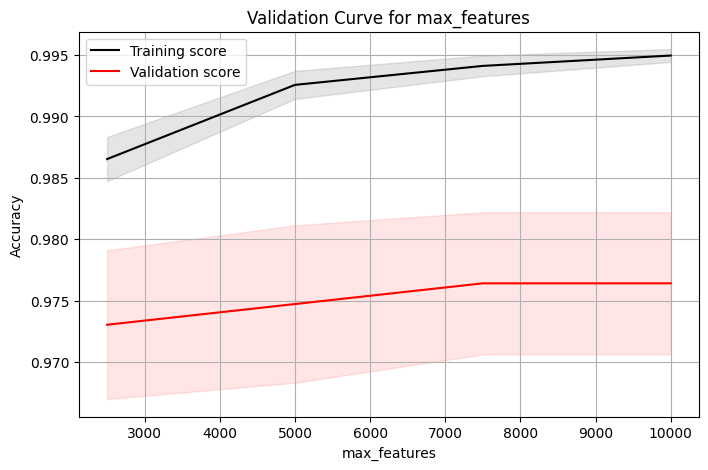

In [ ]:
max_features_range = np.arange(2500, 10001, 2500)
train_scores, test_scores = validation_curve(
    estimator=model, 
    X=X_train, 
    y=y_train, 
    param_name='vectorizer__max_features', 
    param_range=max_features_range, 
    cv=5
)


train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 5)) 
plt.plot(max_features_range, train_mean, label='Training score', color='black') 
plt.fill_between(max_features_range, train_mean - train_std, train_mean + train_std, color='black', alpha=0.1) 
plt.plot(max_features_range, test_mean, label='Validation score', color='red') 
plt.fill_between(max_features_range, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1) 
plt.title('Validation Curve for max_features') 
plt.xlabel('max_features') 
plt.ylabel('Accuracy') 
plt.legend(loc='best') 
plt.grid(True) 
plt.show()